In [6]:
import pandas as pd

csv_path = (r"C:\Users\DELL\Desktop\M2 DA&AI course\Master Project\Twitter Inc Stock Price History.csv")
df = pd.read_csv(csv_path)

df.columns, df.head()

(Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object'),
          Date  Price   Open   High    Low     Vol. Change %
 0  10/27/2022  53.70  53.91  54.00  53.70  140.83M    0.66%
 1  10/26/2022  53.35  52.95  53.50  52.77   28.07M    1.08%
 2  10/25/2022  52.78  52.40  53.18  52.20   34.74M    2.45%
 3  10/24/2022  51.52  50.71  51.86  50.52   22.55M    3.27%
 4  10/21/2022  49.89  50.06  50.72  49.60   51.21M   -4.86%)

In [8]:
df["Return"] = df["Change %"].str.replace('%', '', regex=False).astype(float) / 100

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)

df[["Date", "Price", "Return"]].head()

,Date,Price,Return
0,2021-10-28,54.29,-0.0095
1,2021-10-29,53.54,-0.0138
2,2021-11-01,55.11,0.0293
3,2021-11-02,53.99,-0.0203
4,2021-11-03,54.53,0.0100


In [10]:
baseline_df = df[(df["Date"] >= "2021-10-28") & (df["Date"] <= "2022-04-01")]


mean_return = baseline_df["Return"].mean()
std_return = baseline_df["Return"].std()
n_baseline = baseline_df.shape[0]  # 样本数量

mean_return, std_return, n_baseline

(-0.00271574074074074, 0.026986708954480514, 108)

In [ ]:
mean_return = -0.00271574074074074
std_return = 0.0269867089544880514

In [ ]:


# The base period (28 October 2021 to 1 April 2022) is calculated as follows:

# Average return rate: -0.00272 (approximately -0.27%)

# Standard Deviation: 0.02699 (approximately 2.70%

# Sample size: 108 trading days

In [14]:
event_dates = [
    "2022-04-14",
    "2022-05-13",
    "2022-07-08",
    "2022-10-04",
    "2022-10-27"
]

events_df = df[df["Date"].isin(pd.to_datetime(event_dates))][["Date", "Price", "Return"]].copy()
events_df["T_Value"] = (events_df["Return"] - mean_return) / std_return


print(events_df)

          Date  Price  Return   T_Value
116 2022-04-14  45.08 -0.0168 -0.521675
136 2022-05-13  40.72 -0.0967 -3.482030
173 2022-07-08  36.81 -0.0510 -1.788811
234 2022-10-04  52.00  0.2224  8.340867
251 2022-10-27  53.70  0.0066  0.345313


In [16]:
event_data = [
    ("2022-04-04", "Musk discloses 9.2% Twitter stake", False),
    ("2022-04-10", "Musk says he won’t join Twitter board", True),
    ("2022-04-14", "Musk makes $54.20/share buyout offer", True),
    ("2022-04-25", "Twitter accepts Musk’s offer", False),
    ("2022-05-13", "Musk tweets deal is 'temporarily on hold'", True),
    ("2022-05-26", "Twitter accuses Musk of market manipulation", False),
    ("2022-06-06", "Musk threatens to withdraw deal via tweet", True),
    ("2022-07-08", "Musk officially terminates the deal", True),
    ("2022-10-04", "Musk agrees to proceed with original deal", True),
    ("2022-10-27", "Deal closes; Musk tweets 'The bird is freed'", True)
]
events_df = pd.DataFrame(event_data, columns=["Original_Date", "Event_Description", "Tweet_Related"])
events_df["Original_Date"] = pd.to_datetime(events_df["Original_Date"])



In [18]:
trading_days = set(df["Date"])
adjusted_dates = []
adjust_notes = []

for original in events_df["Original_Date"]:
    adjusted = original
    while adjusted not in trading_days:
        adjusted += pd.Timedelta(days=1)
    adjusted_dates.append(adjusted)
    note = "Same day" if adjusted == original else f"Adjusted to {adjusted.date()}"
    adjust_notes.append(note)

events_df["Adjusted_Date"] = adjusted_dates
events_df["Adjustment_Info"] = adjust_notes


merged = pd.merge(events_df, df[["Date", "Price", "Return"]], left_on="Adjusted_Date", right_on="Date", how="left")



In [20]:
mean_return = -0.00272
std_return = 0.02699
merged["T_Value"] = (merged["Return"] - mean_return) / std_return


final = merged[[
    "Original_Date", "Adjusted_Date", "Event_Description", "Tweet_Related",
    "Price", "Return", "T_Value", "Adjustment_Info"
]].sort_values("Adjusted_Date").reset_index(drop=True)

print(final)


  Original_Date Adjusted_Date                             Event_Description  \
0    2022-04-04    2022-04-04             Musk discloses 9.2% Twitter stake   
1    2022-04-10    2022-04-11         Musk says he won’t join Twitter board   
2    2022-04-14    2022-04-14          Musk makes $54.20/share buyout offer   
3    2022-04-25    2022-04-25                  Twitter accepts Musk’s offer   
4    2022-05-13    2022-05-13     Musk tweets deal is 'temporarily on hold'   
5    2022-05-26    2022-05-26   Twitter accuses Musk of market manipulation   
6    2022-06-06    2022-06-06     Musk threatens to withdraw deal via tweet   
7    2022-07-08    2022-07-08           Musk officially terminates the deal   
8    2022-10-04    2022-10-04     Musk agrees to proceed with original deal   
9    2022-10-27    2022-10-27  Deal closes; Musk tweets 'The bird is freed'   

   Tweet_Related  Price  Return    T_Value         Adjustment_Info  
0          False  49.97  0.2712  10.148944                Sam

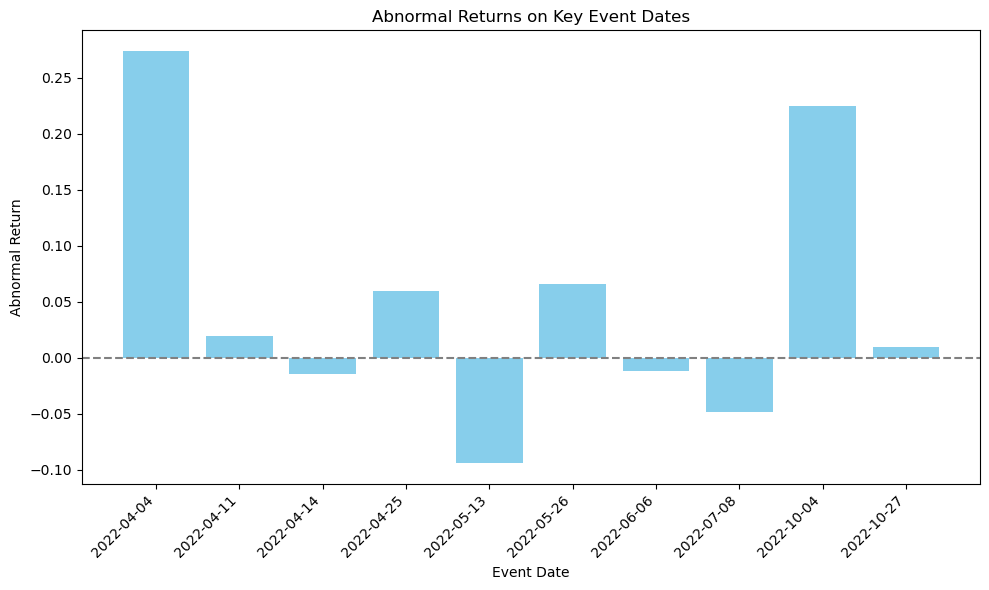

In [31]:
import matplotlib.pyplot as plt


mean_return = -0.00272
df["Abnormal_Return"] = df["Return"] - mean_return


event_df = df[["Adjusted_Date", "Event_Description", "Abnormal_Return"]].dropna()
event_df["Adjusted_Date"] = pd.to_datetime(event_df["Adjusted_Date"])
event_df = event_df.sort_values("Adjusted_Date")


plt.figure(figsize=(10, 6))
plt.bar(event_df["Adjusted_Date"].dt.strftime("%Y-%m-%d"), event_df["Abnormal_Return"], color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.title("Abnormal Returns on Key Event Dates")
plt.xlabel("Event Date")
plt.ylabel("Abnormal Return")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [25]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [29]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()



{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.0772}


In [43]:
tweets = [
    "Do you want an edit button?",
    "I made an offer.",
    "Taking Twitter private at $54.20 should be up to shareholders, not the board",
    "Will endeavor to keep as many shareholders in privatized Twitter as allowed by law",
    "Thanks for the support-Do you want Elon Musk to buy Twitter?",
    "Twitter deal temporarily on hold pending details supporting calculation that spam/fake accounts do indeed represent less than 5% of users",
    "Entering Twitter HQ-let that sink in"
]

results = []
for text in tweets:
    score = analyzer.polarity_scores(text)["compound"]
    results.append((text, score))

for text, s in results:
    print(f"{s:>+6.2f} | {text}")

 +0.08 | Do you want an edit button?
 +0.00 | I made an offer.
 +0.00 | Taking Twitter private at $54.20 should be up to shareholders, not the board
 +0.00 | Will endeavor to keep as many shareholders in privatized Twitter as allowed by law
 +0.49 | Thanks for the support-Do you want Elon Musk to buy Twitter?
 +0.44 | Twitter deal temporarily on hold pending details supporting calculation that spam/fake accounts do indeed represent less than 5% of users
 +0.00 | Entering Twitter HQ-let that sink in


In [47]:
pip install transformers torch


   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.5 MB 660.6 kB/s eta 0:00:16
   ---------------------------------------- 0.0/10.5 MB 393.8 kB/s eta 0:00:27
   ---------------------------------------- 0.0/10.5 MB 393.8 kB/s eta 0:00:27
   ---------------------------------------- 0.1/10.5 MB 416.7 kB/s eta 0:00:25
   ---------------------------------------- 0.1/10.5 MB 403.5 kB/s eta 0:00:26
   ---------------------------------------- 0.1/10.5 MB 368.6 kB/s eta 0:00:29
    --------------------------------------- 0.1/10.5 MB 448.2 kB/s eta 0:00:24
    --------------------------------------- 0.2/10.5 MB 530.7 kB/s eta 0:00:20
    --------------------------------------- 0.2/10.5 MB 541.9 kB/s eta 0:00:19
    --------------------------------------- 0.3/10.5 MB 582.4 kB/s eta 0:00:18
   - -------------------------------------- 0.3/10.5 MB 655.0 kB/s et

In [63]:
from transformers import pipeline


sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    return_all_scores=True,
    truncation=True
)

tweets = [
    "Do you want an edit button?",
    "I made an offer.",
    "Taking Twitter private at $54.20 should be up to shareholders, not the board",
    "Will endeavor to keep as many shareholders in privatized Twitter as allowed by law",
    "Thanks for the support-Do you want Elon Musk to buy Twitter?",
    "Twitter deal temporarily on hold pending details supporting calculation that spam/fake accounts do indeed represent less than 5% of users",
    "Entering Twitter HQ-let that sink in",
    "April 10 – Musk says he will not join the Twitter board after all.",
    "April 25 – Twitter accepts Musk's offer to acquire the company and values the deal at $44 billion, according to an announcement from the company.",
    "May 26 – Twitter shareholders bring a class-action lawsuit against Musk over alleged stock manipulation tied to the tumultuous acquisition process.",
    "June 6 – Musk threatens to pull out of the deal if Twitter doesn't provide additional information about the prevalence of bots on its platform. In a statement, Twitter said it had been sharing information with Musk in accordance with the terms of the merger agreement.",
    "July 8 – Musk moves to terminate his acquisition of Twitter, pointing to the issue of fake accounts.",
    "Oct. 4 – Musk proposes the completion of a deal to acquire Twitter, reversing a monthslong effort to terminate the agreement."

]

print("Tweet Sentiment Analysis Results:")
print("-" * 70)

for i, tweet in enumerate(tweets, 1):
    
    results = sentiment_analyzer(tweet)[0]
    
    scores = {}
    for result in results:
        if result['label'] == 'LABEL_0':
            scores['negative'] = result['score']
        elif result['label'] == 'LABEL_1':
            scores['neutral'] = result['score']
        elif result['label'] == 'LABEL_2':
            scores['positive'] = result['score']
    
    
    sentiment_score = scores['positive'] - scores['negative']
    
    
    if sentiment_score > 0.3:
        sentiment_label = "Strongly Positive"
    elif sentiment_score > 0.1:
        sentiment_label = "Positive"
    elif sentiment_score < -0.3:
        sentiment_label = "Strongly Negative"
    elif sentiment_score < -0.1:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"
    
    
    print(f"{i}. [{sentiment_label} | Score: {sentiment_score:.3f}]")
    print(f"   {tweet}")
    print(f"   → Negative: {scores['negative']:.3f} | Neutral: {scores['neutral']:.3f} | Positive: {scores['positive']:.3f}")
    print("-" * 70)

Device set to use cpu
D:\anaconda\Lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Tweet Sentiment Analysis Results:
----------------------------------------------------------------------
1. [Neutral | Score: -0.046]
   Do you want an edit button?
   → Negative: 0.092 | Neutral: 0.863 | Positive: 0.045
----------------------------------------------------------------------
2. [Neutral | Score: 0.073]
   I made an offer.
   → Negative: 0.110 | Neutral: 0.707 | Positive: 0.183
----------------------------------------------------------------------
3. [Negative | Score: -0.183]
   Taking Twitter private at $54.20 should be up to shareholders, not the board
   → Negative: 0.225 | Neutral: 0.733 | Positive: 0.042
----------------------------------------------------------------------
4. [Positive | Score: 0.187]
   Will endeavor to keep as many shareholders in privatized Twitter as allowed by law
   → Negative: 0.014 | Neutral: 0.786 | Positive: 0.200
----------------------------------------------------------------------
5. [Strongly Positive | Score: 0.853]
   Thanks for th

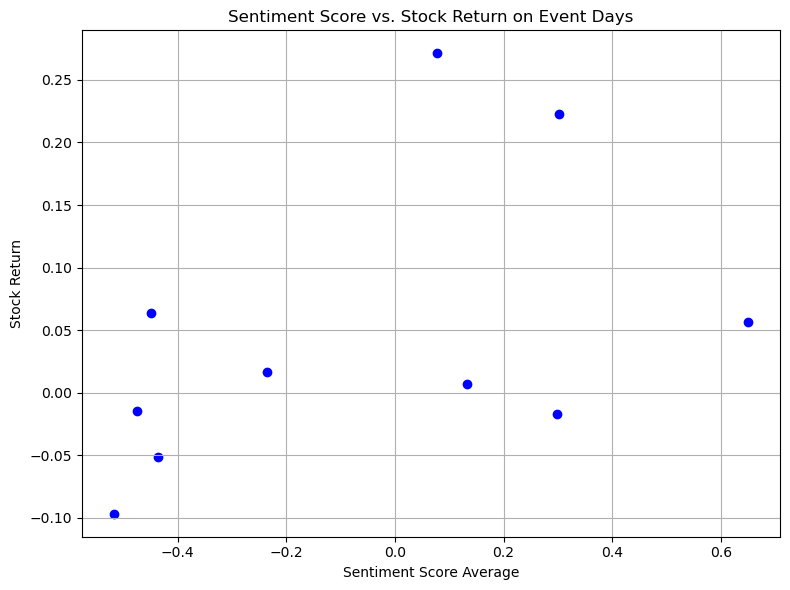

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel(r"C:\Users\DELL\Desktop\M2 DA&AI course\Master Project\Musk_Event_Analysis_Updated_Sentiment.xlsx")


plot_df = df.dropna(subset=["Sentiment_Score_Average", "Return"])


plt.figure(figsize=(8, 6))
plt.scatter(plot_df["Sentiment_Score_Average"], plot_df["Return"], color='blue')
plt.title("Sentiment Score vs. Stock Return on Event Days")
plt.xlabel("Sentiment Score Average")
plt.ylabel("Stock Return")
plt.grid(True)
plt.tight_layout()
plt.show()

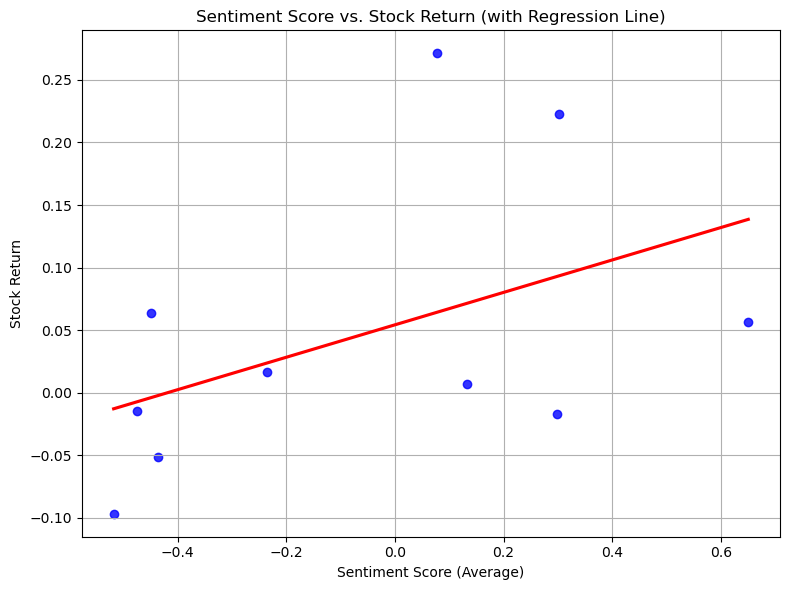

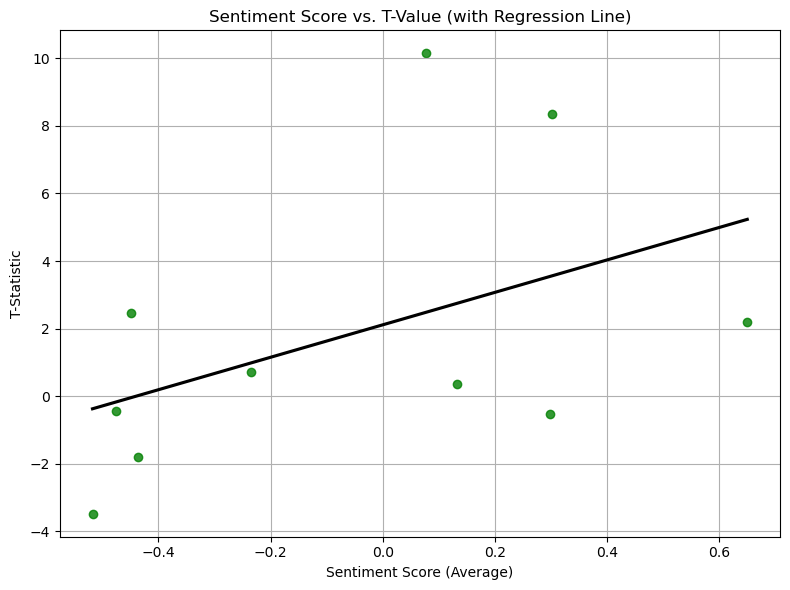

In [13]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_excel(r"C:\Users\DELL\Desktop\M2 DA&AI course\Master Project\Musk_Event_Analysis_Updated_Sentiment.xlsx")


plot_df = df.dropna(subset=["Sentiment_Score_Average", "Return"])
plt.figure(figsize=(8, 6))
sns.regplot(x="Sentiment_Score_Average", y="Return", data=plot_df, ci=None,
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Sentiment Score vs. Stock Return (with Regression Line)")
plt.xlabel("Sentiment Score (Average)")
plt.ylabel("Stock Return")
plt.grid(True)
plt.tight_layout()
plt.show()


plot_df_t = df.dropna(subset=["Sentiment_Score_Average", "T_Value"])
plt.figure(figsize=(8, 6))
sns.regplot(x="Sentiment_Score_Average", y="T_Value", data=plot_df_t, ci=None,
            scatter_kws={"color": "green"}, line_kws={"color": "black"})
plt.title("Sentiment Score vs. T-Value (with Regression Line)")
plt.xlabel("Sentiment Score (Average)")
plt.ylabel("T-Statistic")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
import pandas as pd
import statsmodels.api as sm


df = pd.read_excel(r"C:\Users\DELL\Desktop\M2 DA&AI course\Master Project\Musk_Event_Analysis_Updated_Sentiment.xlsx")


plot_df = df.dropna(subset=["Sentiment_Score_Average", "Return"])


X_return = plot_df["Sentiment_Score_Average"]
y_return = plot_df["Return"]


X_return = sm.add_constant(X_return)


model_return = sm.OLS(y_return, X_return).fit()


print("Regression Model 1：Return ~ Sentiment_Score_Average")
print(model_return.summary())

Regression Model 1：Return ~ Sentiment_Score_Average
                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     2.123
Date:                Thu, 12 Jun 2025   Prob (F-statistic):              0.183
Time:                        06:53:40   Log-Likelihood:                 9.0158
No. Observations:                  10   AIC:                            -14.03
Df Residuals:                       8   BIC:                            -13.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

D:\anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [33]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

scaler = StandardScaler()
X_std = scaler.fit_transform(plot_df[["Sentiment_Score_Average"]])
y_std = scaler.fit_transform(plot_df[["Return"]])


X_std = sm.add_constant(X_std)


model_std = sm.OLS(y_std, X_std).fit()


print("Standardized Regression: Return ~ Sentiment_Score_Average (Standardized)")
print(model_std.summary())

Standardized Regression: Return ~ Sentiment_Score_Average (Standardized)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     2.123
Date:                Thu, 12 Jun 2025   Prob (F-statistic):              0.183
Time:                        07:28:36   Log-Likelihood:                -13.013
No. Observations:                  10   AIC:                             30.03
Df Residuals:                       8   BIC:                             30.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

D:\anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [19]:
plot_df_t = df.dropna(subset=["Sentiment_Score_Average", "T_Value"])


X_tvalue = plot_df_t["Sentiment_Score_Average"]
y_tvalue = plot_df_t["T_Value"]


X_tvalue = sm.add_constant(X_tvalue)


model_tvalue = sm.OLS(y_tvalue, X_tvalue).fit()


print("\n回归模型 2：T_Value ~ Sentiment_Score_Average")
print(model_tvalue.summary())


回归模型 2：T_Value ~ Sentiment_Score_Average
                            OLS Regression Results                            
Dep. Variable:                T_Value   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     2.123
Date:                Thu, 12 Jun 2025   Prob (F-statistic):              0.183
Time:                        06:54:19   Log-Likelihood:                -27.107
No. Observations:                  10   AIC:                             58.21
Df Residuals:                       8   BIC:                             58.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

D:\anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [29]:
import pandas as pd
import statsmodels.api as sm


file_path = (r"C:\Users\DELL\Desktop\M2 DA&AI course\Master Project\Musk_Event_Analysis_Updated_Sentiment.xlsx")
df = pd.read_excel(file_path)

# Model 1：Return ~ Sentiment_Score_Average
plot_df = df.dropna(subset=["Sentiment_Score_Average", "Return"])
X_return = sm.add_constant(plot_df["Sentiment_Score_Average"])
y_return = plot_df["Return"]
model_return = sm.OLS(y_return, X_return).fit()

# Model 2：T_Value ~ Sentiment_Score_Average
plot_df_t = df.dropna(subset=["Sentiment_Score_Average", "T_Value"])
X_tvalue = sm.add_constant(plot_df_t["Sentiment_Score_Average"])
y_tvalue = plot_df_t["T_Value"]
model_tvalue = sm.OLS(y_tvalue, X_tvalue).fit()

regression_summary = pd.DataFrame({
    "Model": ["Return ~ Sentiment", "T_Value ~ Sentiment"],
    "Sentiment Coefficient": [model_return.params["Sentiment_Score_Average"],
                               model_tvalue.params["Sentiment_Score_Average"]],
    "Intercept": [model_return.params["const"], model_tvalue.params["const"]],
    "R-squared": [model_return.rsquared, model_tvalue.rsquared],
    "P-value": [model_return.pvalues["Sentiment_Score_Average"],
                model_tvalue.pvalues["Sentiment_Score_Average"]],
    "Sample Size": [int(model_return.nobs), int(model_tvalue.nobs)]
})

print(regression_summary)

                 Model  Sentiment Coefficient  Intercept  R-squared  P-value  \
0   Return ~ Sentiment               0.129668   0.054247    0.20969  0.18324   
1  T_Value ~ Sentiment               4.804305   2.110683    0.20969  0.18324   

   Sample Size  
0           10  
1           10  
